In [7]:
from components.utils import load_cache
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def get_feature_name():
    import itertools
    ch_names = ['Fp1','Fp2','F3','F4','F7','F8','C3','C4','T3','T4','T5','T6','P3','P4','O1','O2']
    band_names = ['delta','theta','alpha','beta','gamma','slow','beta_low','relative']
    product = itertools.product(band_names, ch_names)
    features = [ feature[1] + '_' + feature[0] for feature in product  ]
    features.append('alpha_frontal')
    features.append('alpha_temporal')
    features.append('alpha_asymetries')
    features.append('beta_frontal')
    features.append('beta_temporal')
    return features

feature_names = np.array(get_feature_name())

config_string = "125-0-5-30-True"
data = load_cache(path=f"../cache/{config_string}", filename='data.pickle')
labels = load_cache(path=f"../cache/{config_string}", filename='labels.pickle')
groups = load_cache(path=f"../cache/{config_string}", filename='groups.pickle')

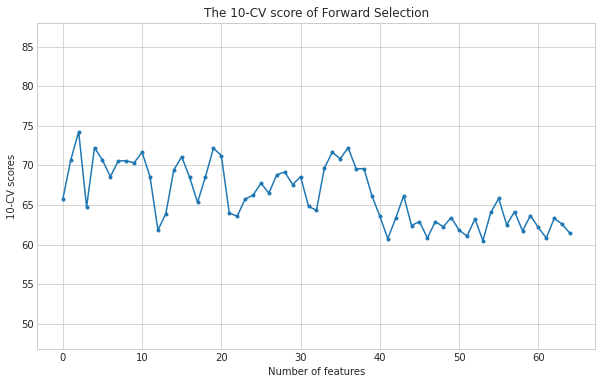

['beta_frontal' 'Fp2_theta' 'F3_relative' 'T6_delta' 'alpha_frontal'
 'Fp1_relative' 'Fp1_delta' 'T4_gamma' 'P3_gamma' 'T3_relative']


In [5]:
def look_up_log(target_set):
    with open(f'../log/{config_string}/selection.log') as f:
        for line in f:
            feature_set = set([ int(i) for i in line.split("|")[3].strip('{}').split(', ') ])

            # print(feature_set == target_set, feature_set, target_set)
            if(feature_set == target_set):
                line = line.rstrip('\n')
                cv = line.split('|')[4]
                std = line.split('|')[5]
                cv = float(cv.split('=')[1])
                std = float(std.split('=')[1])
                return cv, std

rank = np.array(load_cache(path='../selection/{config_string}/forward', filename='rank.pickle'))

cvs, stds = [],[]
for i in range(len(rank)):
    cv,std = look_up_log( set(rank[: i + 1]) )
    cvs.append(cv)
    stds.append(std)

plt.figure(figsize=(10,6))
plt.plot( range(len(cvs)), np.array(cvs)*100, marker='.')
plt.axis('equal')
plt.xlabel('Number of features')
plt.ylabel('10-CV scores')
plt.title('The 10-CV score of Forward Selection')
plt.show()


print(feature_names[rank[:10]])

array([ 2,  4, 36, 19, 10, 34, 20, 15, 35,  1,  5,  8,  7,  9, 33, 38, 37,
       14, 28, 27, 30, 18, 11,  6, 16, 25, 29, 26, 24, 39, 43, 55, 23,  0,
       17, 31,  3, 32, 57, 54, 21, 13, 59, 40, 22, 49, 62, 42, 52, 45, 47,
       63, 56, 44, 48, 60, 12, 50, 58, 64, 51, 46, 61, 41, 53])

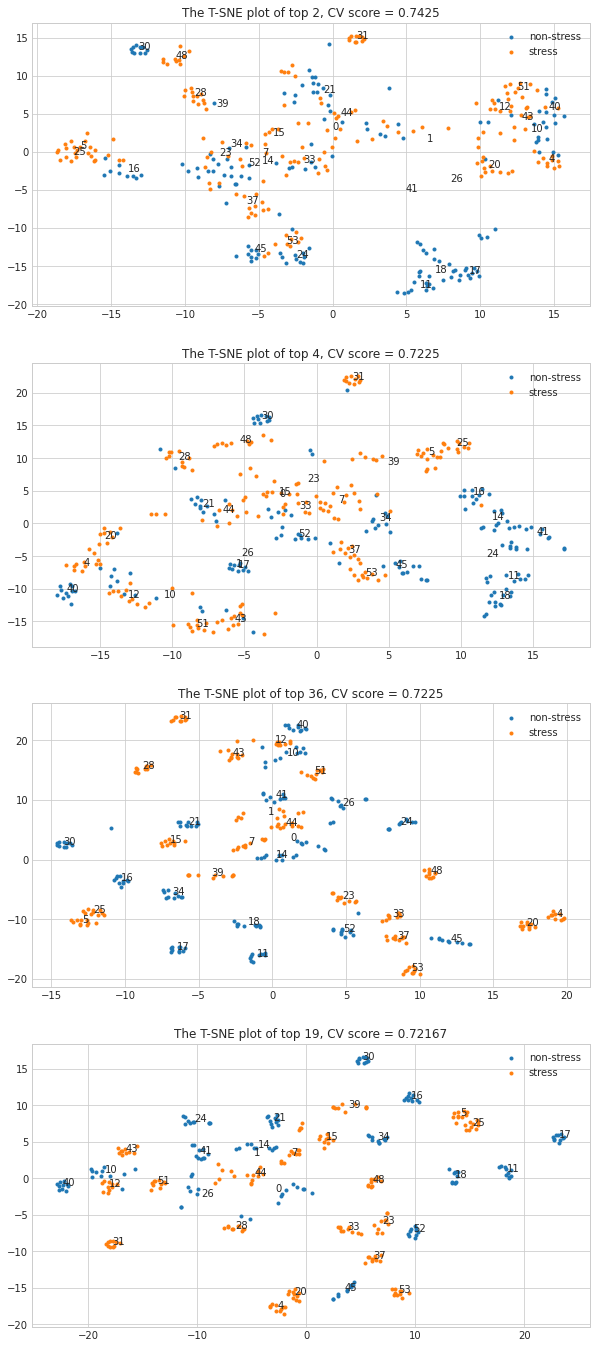

In [39]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(nrows=4, figsize=(10,24))

for i, top in enumerate(np.array(cvs).argsort()[::-1][:4]):
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data[:, rank[:top + 1]])

    for g in np.unique(labels):
        ix = np.where(labels == g)
        X_embedded_filt = X_embedded[ix]
        if(g == 0): label = 'non-stress'
        if(g==1): label='stress'
        ax[i].scatter(X_embedded_filt[:,0], X_embedded_filt[:,1], marker='.', label=label)

    for g in np.unique(groups):
        ix = np.where(groups == g)
        X_embedded_filt = X_embedded[ix]
        X_embedded_filt = X_embedded_filt.mean(axis=0)
        ax[i].text(x=X_embedded_filt[0], y=X_embedded_filt[1], s=g)
    ax[i].set_title(f"The T-SNE plot of top {top}, CV score = {cvs[top]}")
    ax[i].legend()
plt.show()

In [14]:
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33,
       33, 33, 33, 33, 33